In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import skew
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,id,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
1,210,I,0.370,0.280,0.095,0.2655,0.1220,0.0520,0.080,7
2,333,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.156,10
3,111,M,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9
4,77,M,0.595,0.475,0.140,0.9440,0.3625,0.1890,0.315,9


In [3]:
data.shape

(308, 10)

In [4]:
df = data.copy()

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [7]:
df = pd.get_dummies(df, columns=['sex'])
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,False,True,False
1,0.370,0.280,0.095,0.2655,0.1220,0.0520,0.080,7,False,True,False
2,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.156,10,False,True,False
3,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9,False,False,True
4,0.595,0.475,0.140,0.9440,0.3625,0.1890,0.315,9,False,False,True


As we already know we have some outliers in our data, which may or may be cause skewness in our data. We are going to find out that by test

Now we create 2 datasets : 1- with out outliers and 2- with outliers

In [8]:
num_features = ['length','diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight', 'shell_weight']


1: With out Outliers data

In [9]:
def drop_outliers(df):
    df_cleaned = df.copy()
    for column in num_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(df_cleaned[(df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR))][column])
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

In [10]:
# Drop outliers before transformation
df_cleaned = drop_outliers(df)

46     0.110
113    0.160
239    0.075
271    0.165
Name: length, dtype: float64
Series([], Name: diameter, dtype: float64)
Series([], Name: height, dtype: float64)
93     2.141
95     2.550
268    2.124
Name: whole_weight, dtype: float64
14     0.8150
96     0.8175
301    0.9455
Name: shucked_weight, dtype: float64
175    0.541
Name: viscera_weight, dtype: float64
92     0.675
125    0.650
127    0.780
140    0.815
154    0.690
Name: shell_weight, dtype: float64


In [11]:
df_cleaned.shape

(292, 11)

In [12]:
df.shape

(308, 11)

First lets see again our data how much it change

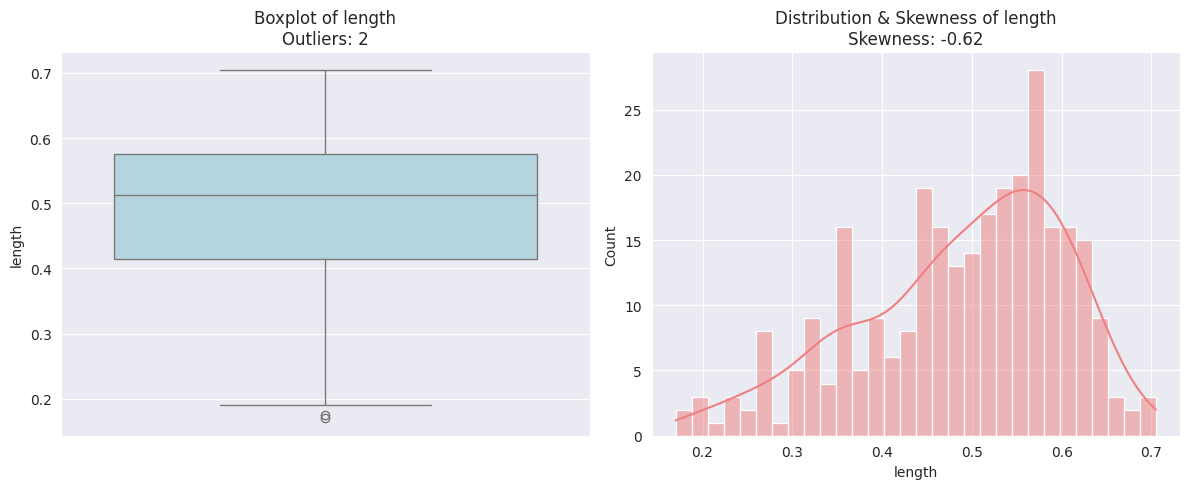

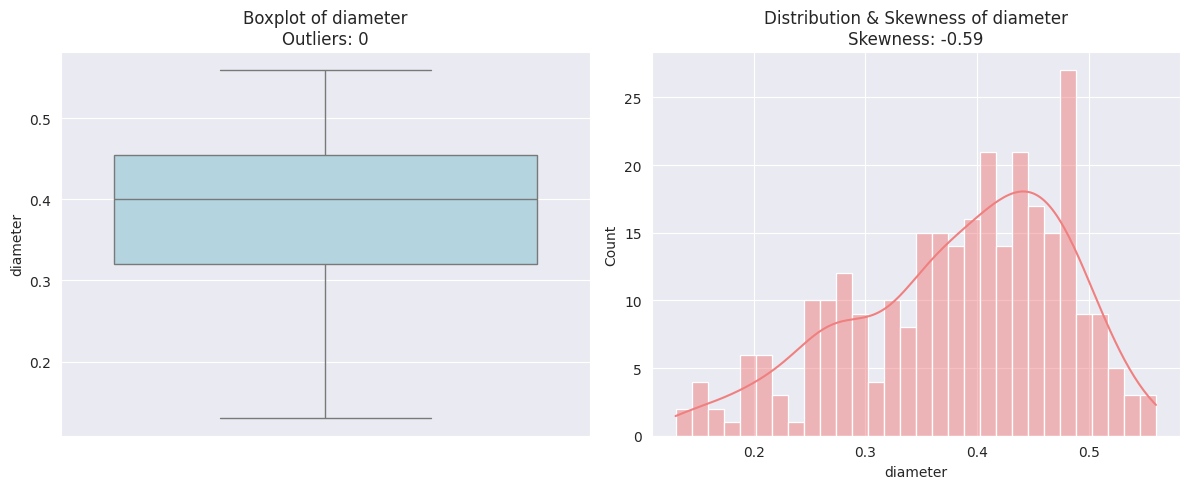

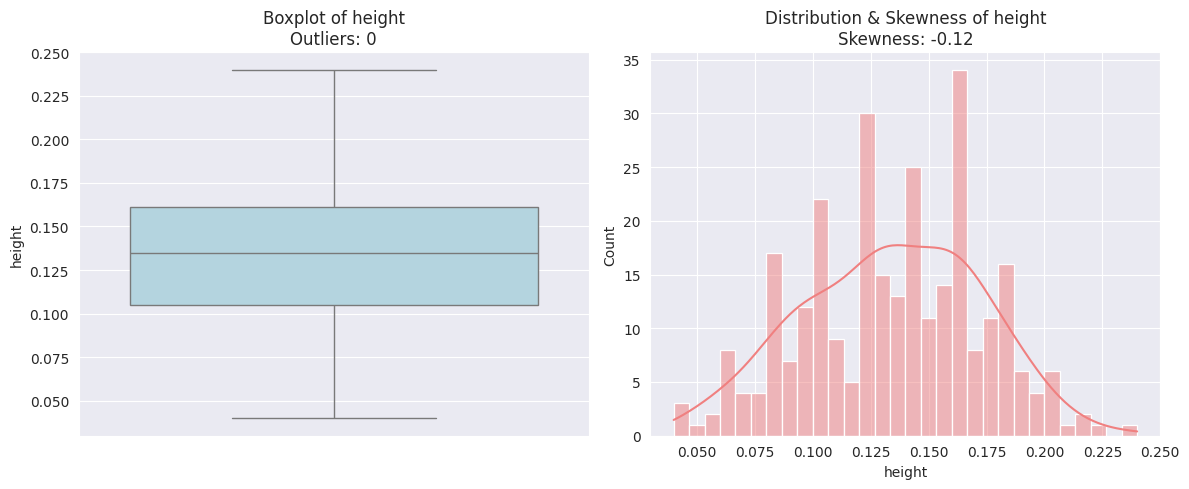

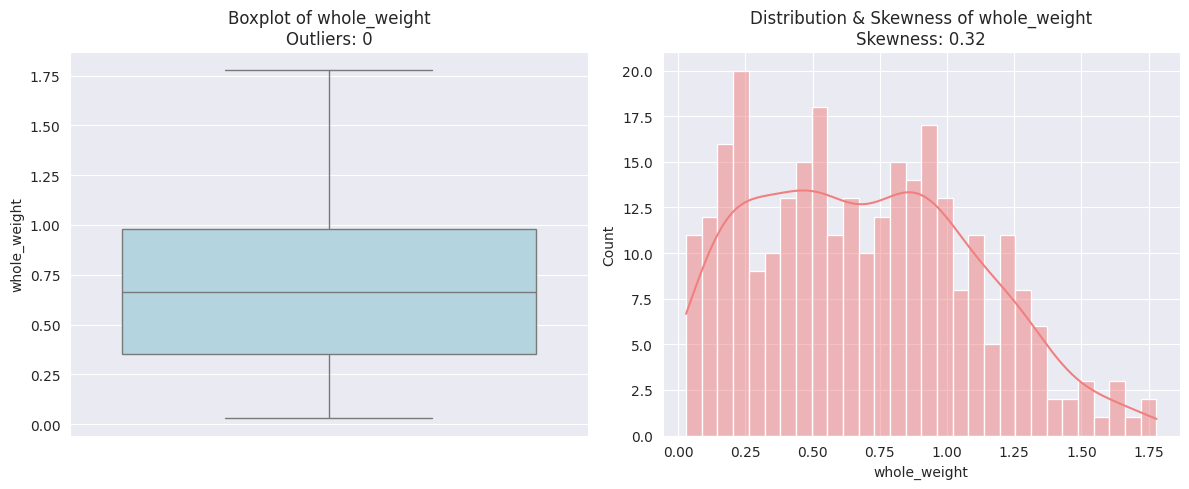

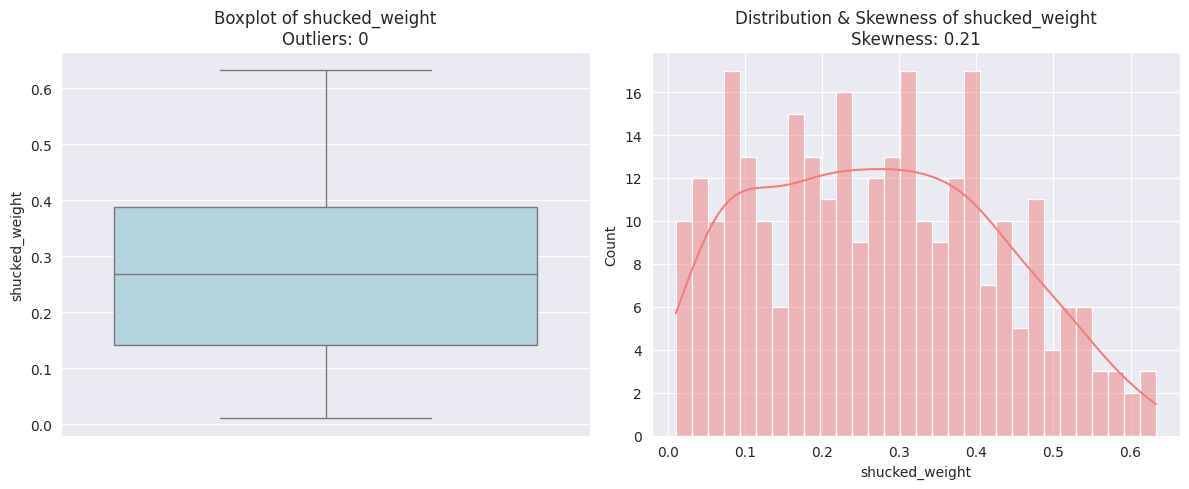

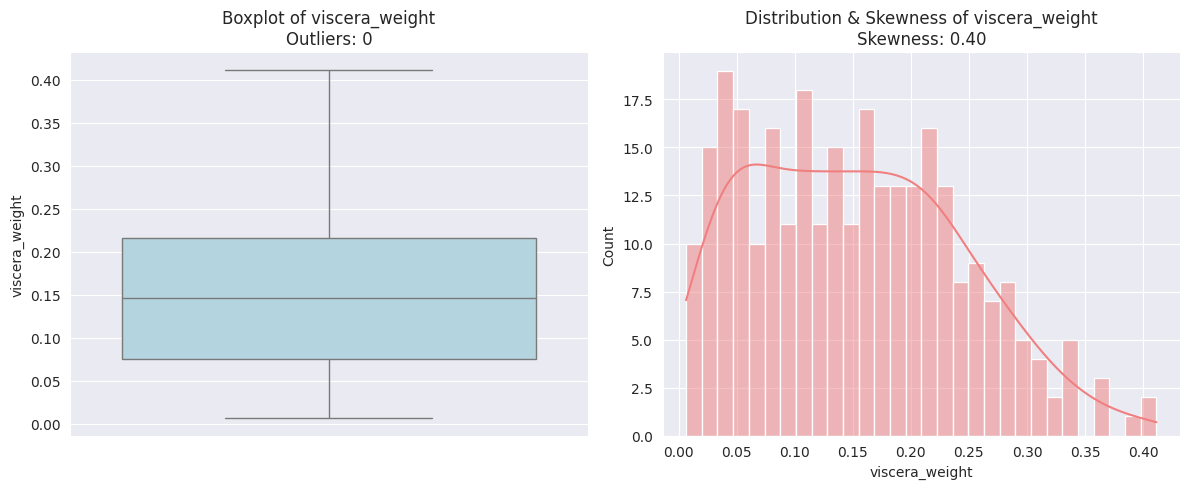

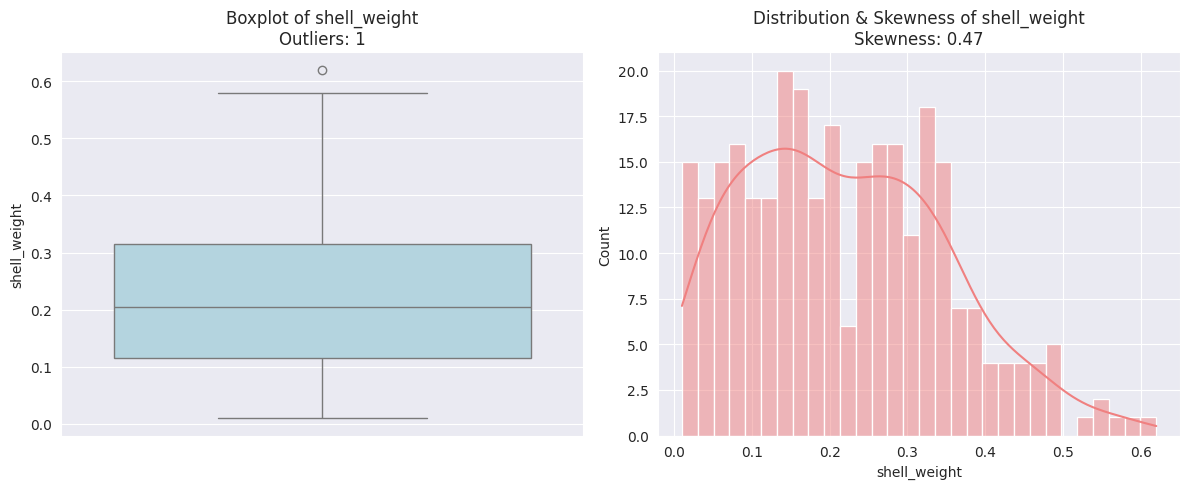

In [13]:
def plot_boxplot_and_skewness(df):
    """
    Plots a boxplot and skewness distribution for each numerical column in the dataset.
    """


    for col in num_features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        num_outliers = outliers.count()

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[0], color='lightblue')
        axes[0].set_title(f'Boxplot of {col}\nOutliers: {num_outliers}')

        # Skewness distribution
        sns.histplot(df[col], kde=True, bins=30, ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Distribution & Skewness of {col}\nSkewness: {skew(df[col], nan_policy="omit"):.2f}')

        plt.tight_layout()
        plt.show()
plot_boxplot_and_skewness(df_cleaned)

our skewness little decrease

In [14]:
# Convert True/False to 1/0 for the boolean columns
df_cleaned[['sex_F', 'sex_I', 'sex_M']] = df_cleaned[['sex_F', 'sex_I', 'sex_M']].astype(int)
df_cleaned

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0
1,0.370,0.280,0.095,0.2655,0.1220,0.0520,0.080,7,0,1,0
2,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.156,10,0,1,0
3,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9,0,0,1
4,0.595,0.475,0.140,0.9440,0.3625,0.1890,0.315,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
303,0.630,0.480,0.160,1.1990,0.5265,0.3350,0.315,11,1,0,0
304,0.400,0.320,0.110,0.3530,0.1405,0.0985,0.100,8,1,0,0
305,0.545,0.430,0.165,0.8020,0.2935,0.1830,0.280,11,1,0,0
306,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22,1,0,0


In [22]:
new_df=shuffle(df_cleaned)

In [27]:
Y = new_df['rings']
X = new_df.drop('rings', axis=1)

In [28]:
X

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
99,0.595,0.465,0.175,1.1150,0.4015,0.2540,0.390,0,0,1
223,0.555,0.445,0.135,0.8360,0.3360,0.1625,0.275,0,0,1
293,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.010,0,1,0
45,0.550,0.435,0.145,0.8430,0.3280,0.1915,0.255,0,0,1
94,0.535,0.415,0.185,0.8415,0.3140,0.1585,0.300,1,0,0
...,...,...,...,...,...,...,...,...,...,...
158,0.500,0.400,0.125,0.6675,0.2610,0.1315,0.220,1,0,0
199,0.560,0.440,0.140,0.9710,0.4430,0.2045,0.265,0,0,1
82,0.625,0.495,0.165,1.2620,0.5070,0.3180,0.390,1,0,0
54,0.525,0.415,0.170,0.8325,0.2755,0.1685,0.310,1,0,0


In [29]:
Y

99     13
223    13
293     4
45     15
94     15
       ..
158    10
199    14
82     10
54     13
213    13
Name: rings, Length: 292, dtype: int64

In [32]:

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.1,random_state =24)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)


100%|██████████| 42/42 [00:02<00:00, 15.06it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 10
[LightGBM] [Info] Start training from score 10.797710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [35]:
best_model = models.head(1)
best_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.77,0.85,1.75,0.07


In [36]:
top3_model = models.head(3)
top3_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.77,0.85,1.75,0.07
GradientBoostingRegressor,0.75,0.84,1.79,0.15
RidgeCV,0.75,0.84,1.80,0.02
